numpy version:  1.11.2
pandas version:  0.20.3
initial centroids:  [[-7.  0.]
 [ 0.  0.]
 [ 7.  0.]]
initial error:  9.89949493661
final error:  0.0
final Centroid:  [[-6.38304758 -5.86392975]
 [ 1.35250223  1.92411029]
 [ 8.54641438 -3.6671133 ]]


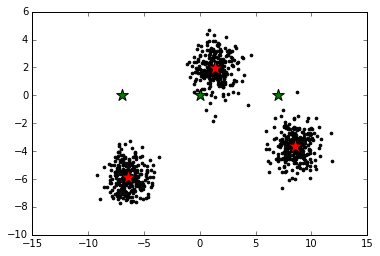

In [3]:
# Task 1. K-means clustering from scratch 

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from copy import deepcopy 

# Check versions
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)

np.random.seed(12345)

# Q1. Create a dataset (X and y) with 3 clusters usng sklearn.datasets.make_blobs
X, y = make_blobs(n_samples= 800, n_features= 2, centers=3, random_state = 12345)

# Q2: define a function to calculate Euclidean distance
def dist(a, b, axis = 1):
    """
    :param a: 1-D input array
    :param b: 1-D input array
    :param axis: an integer for the axis of a and b along which to compute the vector norms
    :return: Eucleadian distance (float) 
    """
    return np.linalg.norm(a-b, axis=axis)

# Q3. Number of clusters
K = 3

# X coordinates of initial centroids
C_x = [-7, 0, 7]
# Y coordinates of initial centroids
C_y = [0, 0, 0]

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print("initial centroids: ", C)

# Plotting along with the initial Centroids
plt.scatter(X[:,0], X[:,1] , c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=150, c='g')

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print('initial error: ', error)

# Loop will run till the error is less than the threshold value
while error >= 1e-4:
    # Q4. Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Q5. Finding the new centroids by taking the average value
    for i in range(K):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

print('final error: ', error)
print('final Centroid: ', C)

# Plotting along with the final Centroids
plt.scatter(C[:,0], C[:,1], marker='*', s=250, c='r')
plt.savefig("final_cluster.png") 

Clusters:  [1 3 2 ..., 6 6 0]


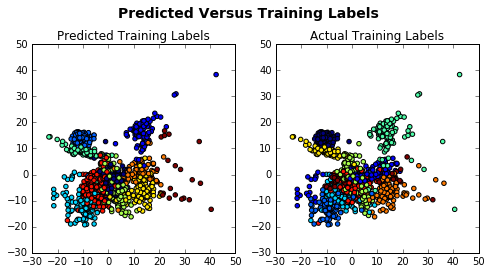

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.manifold import Isomap

np.random.seed(42)

digits = load_digits()

# Q1. scale digits dataset
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.25, random_state=42)

# Q2. Create the KMeans model
kmeans = KMeans(n_clusters=10,init="k-means++",random_state=42)

# Q3. Compute cluster centers and predict cluster index for each samples 
clusters = kmeans.fit_predict(x_train)
print('Clusters: ', clusters)

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(x_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

plt.savefig("digits.png") 
plt.show()